<a href="https://colab.research.google.com/github/rodrigoamorimml/IGTIBootcamp/blob/master/SerieTemporal_Previsao_Passageiros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns

In [3]:
from google.colab import files

upload = files.upload()


Saving international-airline-passengers.csv to international-airline-passengers.csv


In [33]:
data = pd.read_csv('international-airline-passengers.csv', names = ['Month', 'Passengers'])
data.head()

,Month,Passengers
0,Month,International airline passengers: monthly tota...
1,1949-01,112
2,1949-02,118
3,1949-03,132
4,1949-04,129


In [34]:
data = data.iloc[1:, :]
data = data.dropna().reset_index(drop = True)

In [35]:
data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    object
dtypes: object(2)
memory usage: 2.4+ KB


In [41]:
 data.Passengers = pd.to_numeric(data.Passengers)

In [42]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [43]:
data['datetime'] = pd.to_datetime(data['Month'])

In [44]:
data.head()

,Month,Passengers,datetime
0,1949-01,112,1949-01-01
1,1949-02,118,1949-02-01
2,1949-03,132,1949-03-01
3,1949-04,129,1949-04-01
4,1949-05,121,1949-05-01


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       144 non-null    object        
 1   Passengers  144 non-null    int64         
 2   datetime    144 non-null    datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 3.5+ KB


Text(0.5, 1.0, 'Box plot para o embarque de passageiros')

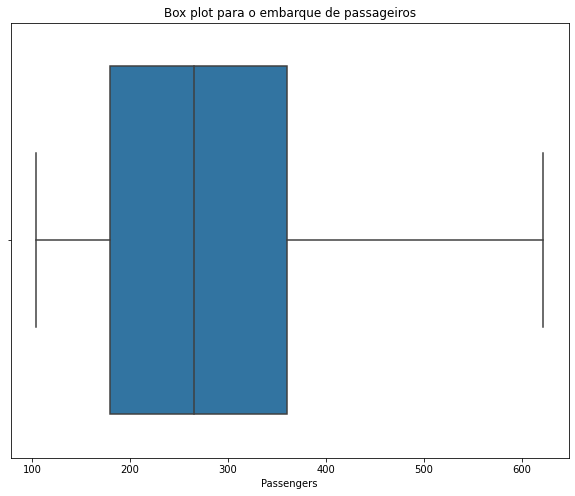

In [47]:
plt.figure(figsize = (10, 8))
g = sns.boxplot(data['Passengers'])
g.set_title('Box plot para o embarque de passageiros')

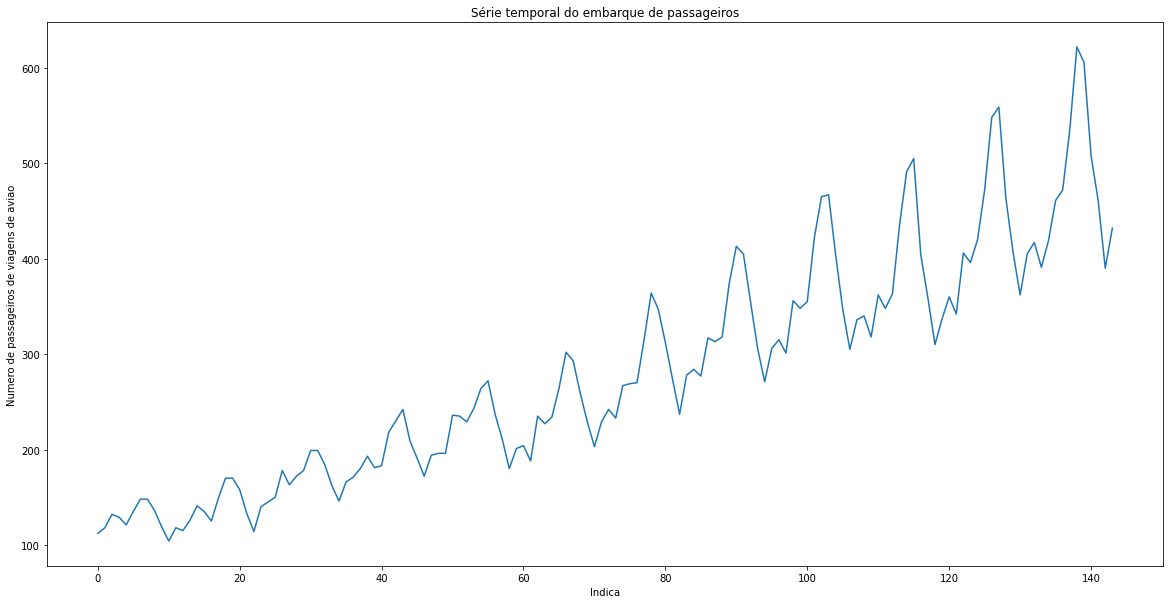

In [48]:
plt.figure(figsize = (20, 10))
g = sns.lineplot(x = data.index, y = data['Passengers'])
g.set_title('Série temporal do embarque de passageiros')
g.set_xlabel('Indica')
g.set_ylabel('Numero de passageiros de viagens de aviao')
plt.show()

In [49]:
# Realizando a decomposição da serie temporal

from statsmodels.tsa.seasonal import seasonal_decompose

data_temporal = data.set_index('datetime')
data_temporal.columns

Index(['Month', 'Passengers'], dtype='object')

In [50]:
data_temporal.drop('Month', axis = 1, inplace = True)

In [51]:
data_temporal.head()

,Passengers
datetime,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [54]:
# realizando a construção do modelo de decomposição da série temporal

decomposicao_aditiva = seasonal_decompose(data_temporal, model = 'aditive', extrapolate_trend= 'freq') # aplica o modelo de decomposição aditiva

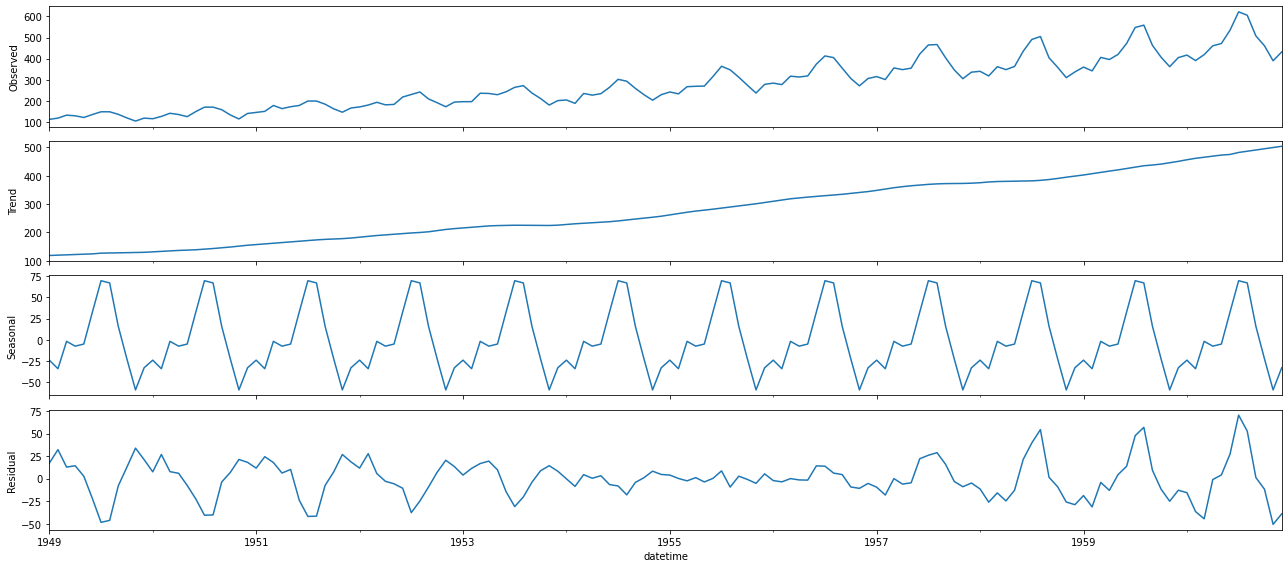

In [55]:
# realiza o plot da decomposição
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
fig = decomposicao_aditiva.plot()
plt.show()


In [56]:
# testando a estacionaridade da série temporal

from statsmodels.tsa.stattools import adfuller # importando o teste ADF



In [57]:
resultado_ADF = adfuller(data_temporal.Passengers.values, autolag = 'AIC') # aplica o teste adf
# para o test ADF a hipotese nula é que existe, pelo menos, uma raiz negativa na série temporal ( série é não estacionaira )


In [58]:
print(f'ADF P-valor: {resultado_ADF[1]}' ) # p - value  é o segundo parametro que retorna da função
# com o p-value maior que 0.05 a hipotese nula não é rejeitada, logo nao é estacionaria

ADF P-valor: 0.991880243437641


In [59]:
resultado_ADF

(0.815368879206047,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '10%': -2.578770059171598,
  '5%': -2.8840418343195267},
 996.6929308390189)

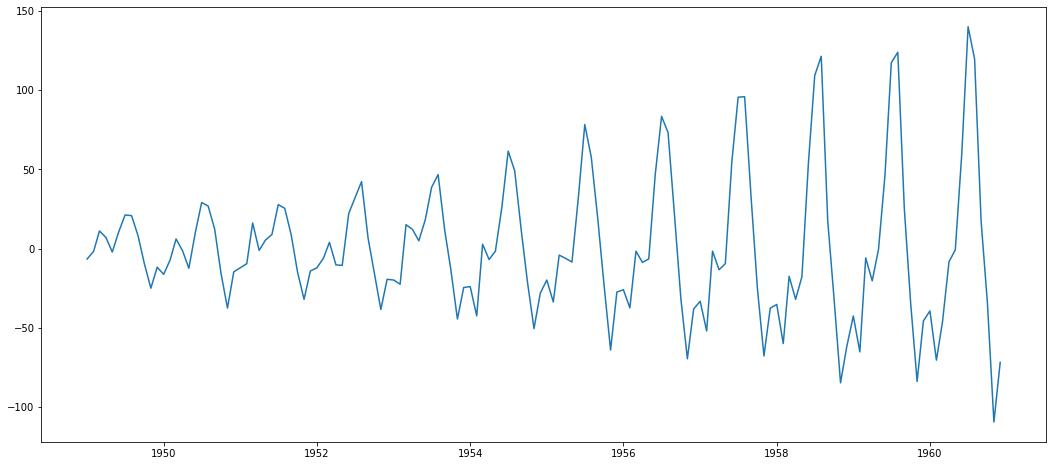

In [60]:
# retirando a tendencia da nossa serie

detrended = data_temporal - decomposicao_aditiva.trend
plt.plot(detrended)

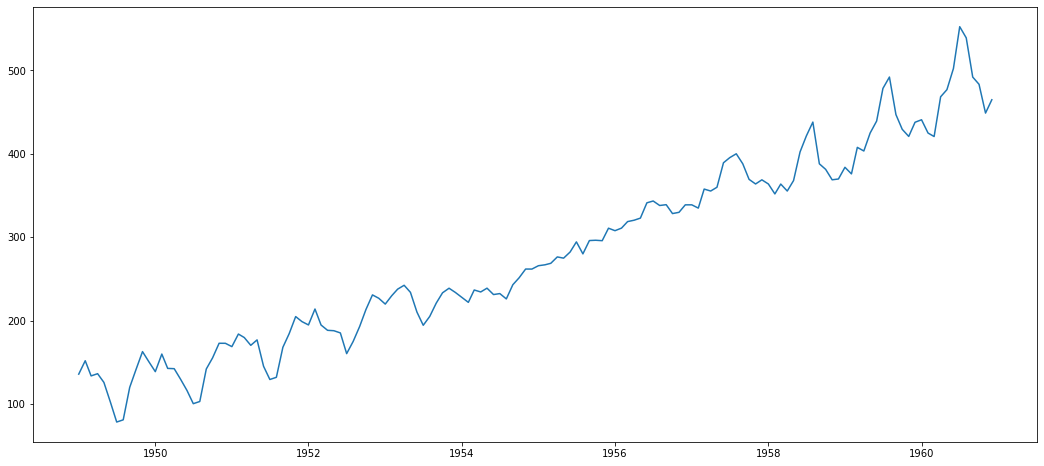

In [62]:
# retirando a sazonalidade da serie

deseasonalized = data_temporal - decomposicao_aditiva.seasonal
plt.plot(deseasonalized)

In [63]:
# realizando a análise de autocorrelação nos dados

from statsmodels.graphics.tsaplots import plot_acf  # importando a biblioteca para o plot de autocorrelação

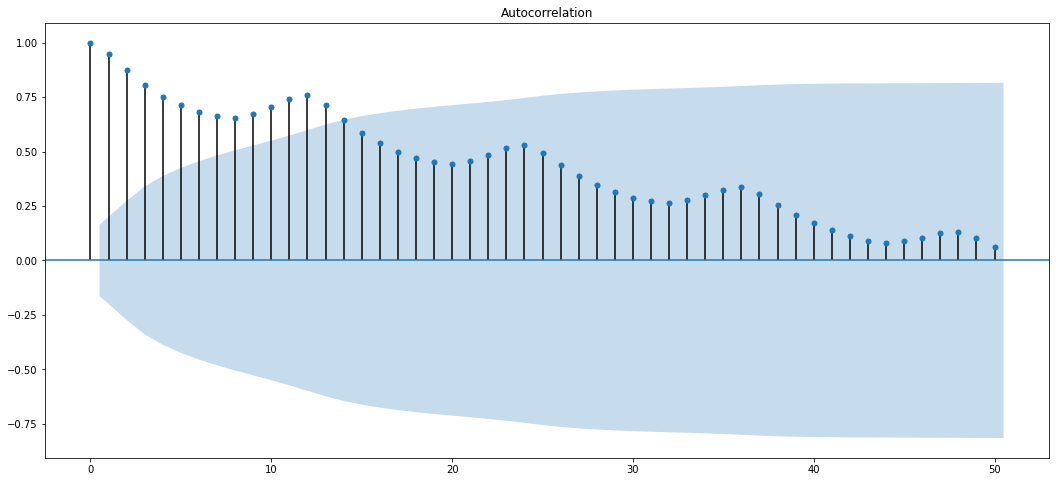

In [66]:
plot_acf(data_temporal, lags = 50) # aplica a autocorrelação entre os dados
plt.show() # mostra uma correlação significativa com 14 lags

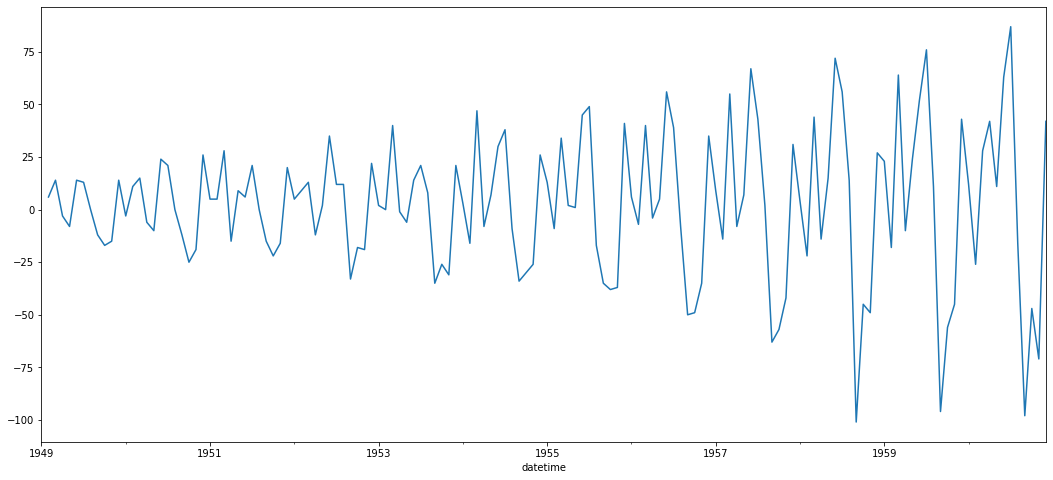

In [68]:
# transformando a serie em estacionaria

data_temporal['Passengers_diff'] = data_temporal['Passengers'] - data_temporal['Passengers'].shift(1) # aplica o primeiro shift (derivada para o tempo discreto) 
data_temporal['Passengers_diff'] = data_temporal['Passengers_diff'].dropna() 
data_temporal['Passengers_diff'].plot()

In [70]:
# Conferindo se agora a series está estacionaria

x_diff = data_temporal['Passengers_diff'].dropna().values
resultado_primeira_diff = adfuller(x_diff)
print(f'p-valor: {resultado_primeira_diff[1]}')

p-valor: 0.054213290283824704


In [90]:
import tensorflow as tf
import math

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, LSTM, Input
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler

In [72]:
# volta o dataset para o formato original
serie_passageiros = data_temporal['Passengers'].values

In [74]:
# normalização do banco de dados, necessario para que os algoritmos possam ter um comportamento mais previsivel
scaler = MinMaxScaler(feature_range = (0, 1)) # cria o objeto que realiza a normalização dos dados por meios dos valores minimos e maximos
dataset = scaler.fit_transform(serie_passageiros.reshape(-1, 1))

In [75]:
print(dataset[0:20])

[[0.01544402]
 [0.02702703]
 [0.05405405]
 [0.04826255]
 [0.03281853]
 [0.05984556]
 [0.08494208]
 [0.08494208]
 [0.06177606]
 [0.02895753]
 [0.        ]
 [0.02702703]
 [0.02123552]
 [0.04247104]
 [0.07142857]
 [0.05984556]
 [0.04054054]
 [0.08687259]
 [0.12741313]
 [0.12741313]]


In [76]:
# divide o conjunto de dados em treinamento e test
train_size = int(len(dataset) * 0.67) # encontra o valor maximo para o treinamento
test_size = len(dataset) - train_size
train, test = dataset[0: train_size, :] , dataset[train_size: len(dataset), :]
print(len(train), len(test))

96 48


In [86]:
# Cria a matrix necessaria para a entrada de dados

def create_dataset(dataset, look_back = 1):
  dataX, dataY = [], []
  for i in range(len(dataset) - look_back - 1):
    a = dataset[i: (i + look_back), 0]
    dataX.append(a)
    dataY.append(dataset[i + look_back, 0])
  return np.array(dataX), np.array(dataY)

In [87]:
# cria o reshape para que os dados estejam em um formato ideal : N x T x D
look_back = 14 # sera utilizado apenas um passo anterior para a previsao
trainX, trainY = create_dataset(train , look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [88]:
trainX.shape

(81, 1, 14)

In [91]:
# cria o modelo utilizando RNN (LSTM)
i = Input(shape = (1, look_back))
x = LSTM(4)(i)
x = Dense(1)(x)

model = Model(i, x)

model.summary()

model.compile(loss = 'mean_squared_error', optimizer = 'adam')

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 1, 14)]           0         
_________________________________________________________________
lstm (LSTM)                  (None, 4)                 304       
_________________________________________________________________
dense (Dense)                (None, 1)                 5         
Total params: 309
Trainable params: 309
Non-trainable params: 0
_________________________________________________________________


In [92]:
model.fit(trainX, trainY, epochs = 100, batch_size = 1, verbose = 2)

Epoch 1/100
81/81 - 0s - loss: 0.0137
Epoch 2/100
81/81 - 0s - loss: 0.0025
Epoch 3/100
81/81 - 0s - loss: 0.0023
Epoch 4/100
81/81 - 0s - loss: 0.0021
Epoch 5/100
81/81 - 0s - loss: 0.0020
Epoch 6/100
81/81 - 0s - loss: 0.0019
Epoch 7/100
81/81 - 0s - loss: 0.0019
Epoch 8/100
81/81 - 0s - loss: 0.0019
Epoch 9/100
81/81 - 0s - loss: 0.0017
Epoch 10/100
81/81 - 0s - loss: 0.0017
Epoch 11/100
81/81 - 0s - loss: 0.0016
Epoch 12/100
81/81 - 0s - loss: 0.0016
Epoch 13/100
81/81 - 0s - loss: 0.0015
Epoch 14/100
81/81 - 0s - loss: 0.0014
Epoch 15/100
81/81 - 0s - loss: 0.0014
Epoch 16/100
81/81 - 0s - loss: 0.0014
Epoch 17/100
81/81 - 0s - loss: 0.0013
Epoch 18/100
81/81 - 0s - loss: 0.0013
Epoch 19/100
81/81 - 0s - loss: 0.0013
Epoch 20/100
81/81 - 0s - loss: 0.0012
Epoch 21/100
81/81 - 0s - loss: 0.0011
Epoch 22/100
81/81 - 0s - loss: 0.0012
Epoch 23/100
81/81 - 0s - loss: 0.0011
Epoch 24/100
81/81 - 0s - loss: 0.0011
Epoch 25/100
81/81 - 0s - loss: 0.0011
Epoch 26/100
81/81 - 0s - loss: 0.

In [99]:
# realiza as previsoes
train_predict = model.predict(trainX)
test_predict = model.predict(testX)

In [100]:
# coloca os dados no formato original
train_predict =  scaler.inverse_transform(train_predict)
trainY = scaler.inverse_transform([trainY])
test_predict = scaler.inverse_transform(test_predict)
testY = scaler.inverse_transform([testY])

In [105]:
# Realiza a mudança dos dados para a previsao

train_predict_plot = np.empty_like(dataset)
train_predict_plot[:, :] = np.nan
train_predict_plot[look_back: len(train_predict) + look_back, :] = train_predict

# shift para os dados de test
test_predict_plot = np.empty_like(dataset)
test_predict_plot[:, :] = np.nan
test_predict_plot[len(train_predict) + (look_back*2) + 1 : len(dataset) - 1, :] = test_predict

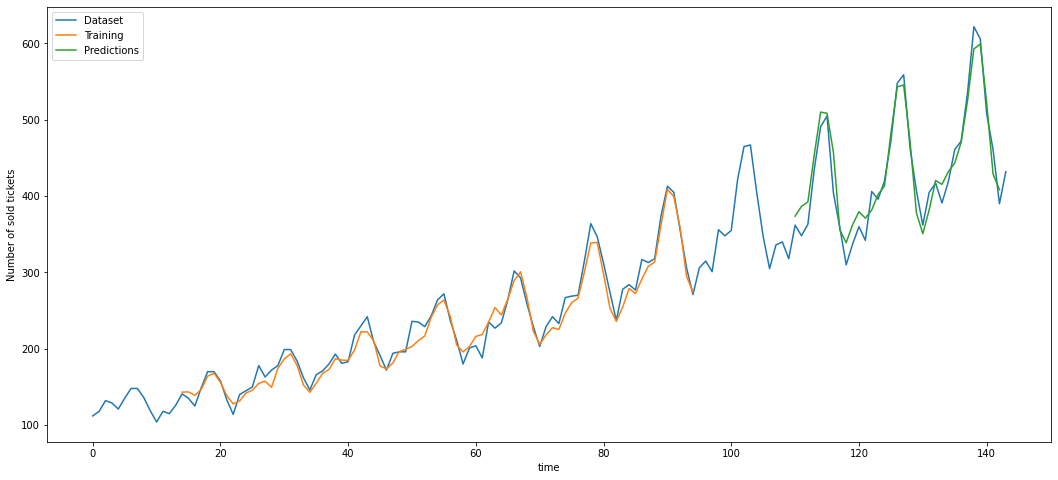

In [106]:
# Realiza o plot dos dados de previsao e real

plt.plot(scaler.inverse_transform(dataset), label = 'Dataset' )
plt.plot(train_predict_plot, label = 'Training')
plt.plot(test_predict_plot, label = 'Predictions')
plt.xlabel('time')
plt.ylabel('Number of sold tickets')
plt.legend(loc = 'best')
plt.show()

In [104]:
dataset

array([[0.01544402],
       [0.02702703],
       [0.05405405],
       [0.04826255],
       [0.03281853],
       [0.05984556],
       [0.08494208],
       [0.08494208],
       [0.06177606],
       [0.02895753],
       [0.        ],
       [0.02702703],
       [0.02123552],
       [0.04247104],
       [0.07142857],
       [0.05984556],
       [0.04054054],
       [0.08687259],
       [0.12741313],
       [0.12741313],
       [0.1042471 ],
       [0.05598456],
       [0.01930502],
       [0.06949807],
       [0.07915058],
       [0.08880309],
       [0.14285714],
       [0.11389961],
       [0.13127413],
       [0.14285714],
       [0.18339768],
       [0.18339768],
       [0.15444015],
       [0.11196911],
       [0.08108108],
       [0.11969112],
       [0.12934363],
       [0.14671815],
       [0.17181467],
       [0.14864865],
       [0.15250965],
       [0.22007722],
       [0.24324324],
       [0.26640927],
       [0.2027027 ],
       [0.16795367],
       [0.13127413],
       [0.173